In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# read dataset
data = pd.read_csv('data/news.csv')

# shape and head
print(f'Shape: {data.shape}')
data.head()

Shape: (6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Head:
0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

Target Count:
REAL    3171
FAKE    3164
Name: label, dtype: int64



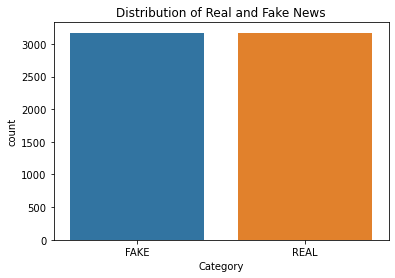

In [4]:
# get label, display
labels = data.label
print(f'Head:\n{labels.head()}\n')

# count target labels
target = labels.value_counts()
print(f'Target Count:\n{target}\n')

# visualize with seaborn
sns.countplot(x=data.label)
plt.title(label='Distribution of Real and Fake News')
plt.xlabel('Category')
plt.savefig('graph/category_count.png')
plt.show()

In [5]:
# split to train and test
x_train, x_test, y_train, y_test = train_test_split(data['text'], labels, test_size=0.2, random_state=7)

In [6]:
# initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [7]:
# initialize passive aggressive classifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

# predict on the test set and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 92.82%


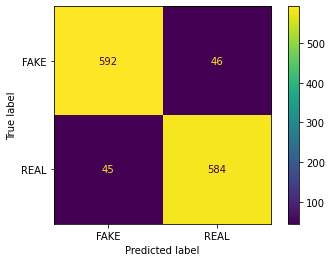

In [8]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
cm_disp = ConfusionMatrixDisplay(cm, display_labels=['FAKE', 'REAL'])
cm_disp.plot()
plt.savefig('graph/confusion_matrix.png')
plt.show()